In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib import colormaps
from src.models.NSI import NSI
from src.models.channel import *
from src.models.continuous_models import *
from tqdm.notebook import tqdm
import pickle
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from scipy import stats
from scipy.interpolate import interp1d
from collections import defaultdict
import numpy as np
import networkx as nx
import matplotlib
from itertools import product

In [91]:
test_run = run_MI(Q=bin_asym_channel(0.1, np.abs(0.1-0.07)), E=single_flip_channel(1, 0.07), num_runs=100, N=10e3, 
                 resolution=50, n_bootstrap=100,T=1500)

Simulating NSI: 100%|█████████████████████████| 100/100 [00:27<00:00,  3.58it/s]
Estimating CIs: 31it [00:00, 32.15it/s]
Simulating RW: 100%|█████████████████████████| 100/100 [00:00<00:00, 530.73it/s]
Estimating CIs: 31it [00:00, 32.69it/s]
Simulating SI: 100%|██████████████████████████| 100/100 [00:21<00:00,  4.65it/s]
Estimating CIs: 31it [00:00, 32.88it/s]


In [94]:
test_run_bs = run_MI(Q=single_flip_channel(1, 0.07), E=single_flip_channel(1, 0.07), num_runs=100, N=10e3, 
                 resolution=50, n_bootstrap=100, T=1500)

Simulating NSI: 100%|█████████████████████████| 100/100 [00:27<00:00,  3.58it/s]
Estimating CIs: 31it [00:00, 32.57it/s]
Simulating RW: 100%|█████████████████████████| 100/100 [00:00<00:00, 541.44it/s]
Estimating CIs: 31it [00:00, 32.06it/s]
Simulating SI: 100%|██████████████████████████| 100/100 [00:21<00:00,  4.62it/s]
Estimating CIs: 31it [00:00, 32.11it/s]


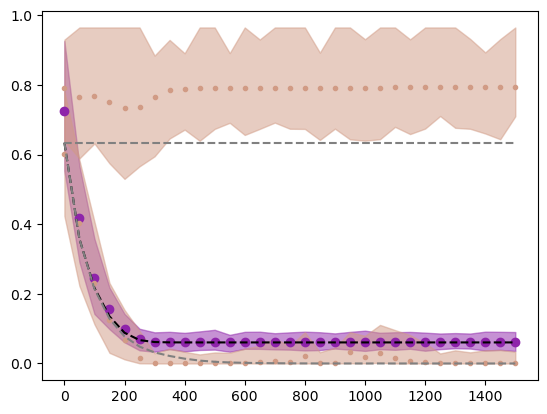

In [102]:
plt.plot(test_run['time'], test_run['mc_means'], 'o', color=magenta)
plt.fill_between(test_run['time'], test_run['mc_lower'], test_run['mc_upper'], color=magenta, alpha=0.5)
plt.plot(test_run['time'], test_run['mean_field'],linestyle='dashed', color='k')

plt.plot(test_run['time'], test_run['rw_means'], '.',color=beige)
plt.fill_between(test_run['time'], test_run['rw_lower'], test_run['rw_upper'], alpha=0.5, color=beige)
plt.plot(test_run['time'], test_run['markov_chain'],linestyle='dashed', color='gray')

plt.plot(test_run['time'], test_run['si_means'], '.', color=beige)
plt.fill_between(test_run['time'], test_run['si_lower'], test_run['si_upper'], alpha=0.5, color=beige)
plt.plot(test_run['time'], test_run['SI'],linestyle='dashed', color='gray')

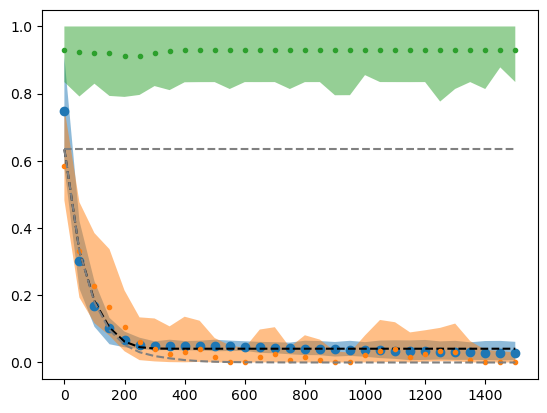

In [95]:
plt.plot(test_run_bs['time'], test_run_bs['mc_means'], 'o')
plt.fill_between(test_run_bs['time'], test_run_bs['mc_lower'], test_run_bs['mc_upper'], alpha=0.5)
plt.plot(test_run_bs['time'], test_run_bs['mean_field'],linestyle='dashed', color='k')

plt.plot(test_run_bs['time'], test_run_bs['rw_means'], '.')
plt.fill_between(test_run_bs['time'], test_run_bs['rw_lower'], test_run_bs['rw_upper'], alpha=0.5)
plt.plot(test_run_bs['time'], test_run_bs['markov_chain'],linestyle='dashed', color='gray')

plt.plot(test_run_bs['time'], test_run_bs['si_means'], '.')
plt.fill_between(test_run_bs['time'], test_run_bs['si_lower'], test_run_bs['si_upper'], alpha=0.5)
plt.plot(test_run_bs['time'], test_run_bs['SI'],linestyle='dashed', color='gray')

# Building the Plots

In [2]:
colors = ["#CBAACB", "#D2B48C", "#FFA3A3", "#FFD1A9"]

In [77]:
eps_to_test = [0.01, 0.1]
dlt_to_test = [0, 0.1]

MIt_binsym = {}
for eps in eps_to_test:
    MIt_binsym[eps] = {}
    for dlt in dlt_to_test:
        MIt_binsym[eps][dlt] = run_MI(Q=single_flip_channel(1, eps), E=single_flip_channel(1, dlt), num_runs=1000, N=10e3, 
                                      resolution=50, n_bootstrap=1000,T=600)
        


Simulating: 100%|███████████████████████████| 1000/1000 [04:28<00:00,  3.72it/s]
Estimating CIs: 13it [00:09,  1.44it/s]
Simulating: 100%|███████████████████████████| 1000/1000 [04:29<00:00,  3.71it/s]
Estimating CIs: 13it [00:09,  1.42it/s]
Simulating: 100%|███████████████████████████| 1000/1000 [04:29<00:00,  3.71it/s]
Estimating CIs: 13it [00:08,  1.45it/s]
Simulating: 100%|███████████████████████████| 1000/1000 [04:29<00:00,  3.71it/s]
Estimating CIs: 13it [00:08,  1.45it/s]


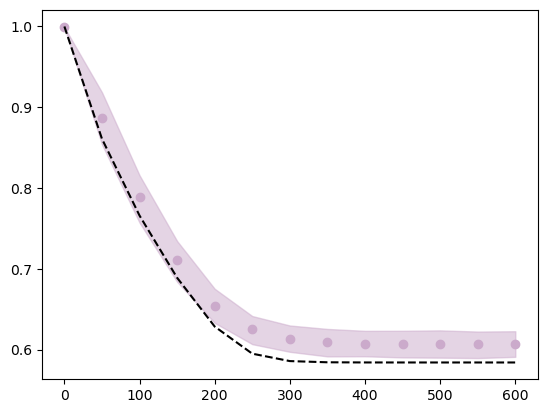

In [53]:
plt.plot(MIt_binsym[0.01][0]['time'], MIt_binsym[0.01][0]['mc_means'], marker='o',
        linestyle='None', color=colors[0])
plt.plot(MIt_binsym[0.01][0]['time'], MIt_binsym[0.01][0]['mean_field'],
        linestyle='dashed', color='k')
plt.fill_between(MIt_binsym[0.01][0]['time'], MIt_binsym[0.01][0]['mc_lower'], 
                 MIt_binsym[0.01][0]['mc_upper'], color=colors[0], alpha=0.5)

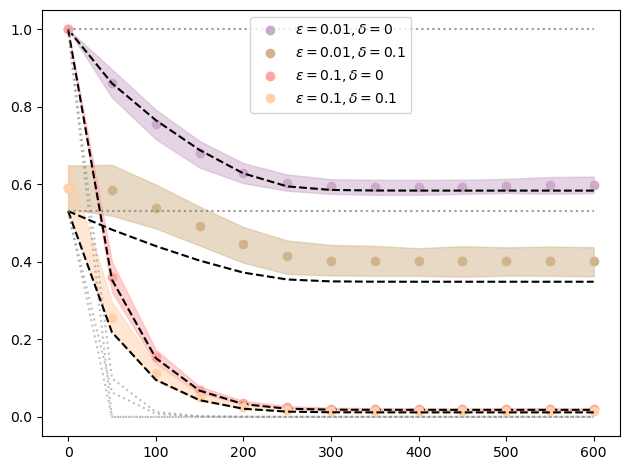

In [78]:
for n,eps in enumerate(eps_to_test):
    for m,dlt in enumerate(dlt_to_test):
        if n==1:
            m += 1
        plt.plot(MIt_binsym[eps][dlt]['time'], MIt_binsym[eps][dlt]['mc_means'], marker='o',
                 linestyle='None', color=colors[n+m], label=fr'$\epsilon={eps}, \delta={dlt}$')
        plt.plot(MIt_binsym[eps][dlt]['time'], MIt_binsym[eps][dlt]['mean_field'],
                 linestyle='dashed', color='k')
        plt.fill_between(MIt_binsym[eps][dlt]['time'], MIt_binsym[eps][dlt]['mc_lower'], 
                 MIt_binsym[eps][dlt]['mc_upper'], color=colors[n+m], alpha=0.5)
        plt.plot(MIt_binsym[eps][dlt]['time'], MIt_binsym[eps][dlt]['markov_chain'],
                 color='gray', linestyle='dotted',alpha=0.5)
        plt.plot(MIt_binsym[eps][dlt]['time'], MIt_binsym[eps][dlt]['SI'], 
                 color='gray', linestyle='dotted', alpha=0.5)
        
plt.legend()
plt.tight_layout()

In [82]:
def plot_MIt_curves(d,
                   eps_to_test,
                   dlt_to_test):
    for n,eps in enumerate(eps_to_test):
        for m,dlt in enumerate(dlt_to_test):
            if n==1:
                m += 1
            plt.plot(d[eps][dlt]['time'], d[eps][dlt]['mc_means'], marker='o',
                     linestyle='None', color=colors[n+m], label=fr'$\epsilon={eps}, \delta={dlt}$')
            plt.plot(d[eps][dlt]['time'], d[eps][dlt]['mean_field'],
                     linestyle='dashed', color='k')
            plt.fill_between(d[eps][dlt]['time'], d[eps][dlt]['mc_lower'], 
                     d[eps][dlt]['mc_upper'], color=colors[n+m], alpha=0.5)
            
            # tiny shifts in these for visualization
            plt.plot(d[eps][dlt]['time'],[i+(eps/100) for i in d[eps][dlt]['markov_chain']],
                     color=colors[n+m],alpha=0.5)
            plt.plot(d[eps][dlt]['time'], [i+(eps/100) for i in d[eps][dlt]['SI']], 
                     color=colors[n+m], linestyle='dotted', alpha=0.5)
            
    plt.tight_layout()

Simulating: 100%|███████████████████████████| 1000/1000 [04:28<00:00,  3.72it/s]
Estimating CIs: 25it [00:17,  1.42it/s]
Simulating: 100%|███████████████████████████| 1000/1000 [04:24<00:00,  3.78it/s]
Estimating CIs: 25it [00:17,  1.41it/s]
Simulating: 100%|███████████████████████████| 1000/1000 [04:28<00:00,  3.72it/s]
Estimating CIs: 25it [00:17,  1.42it/s]
Simulating: 100%|███████████████████████████| 1000/1000 [04:28<00:00,  3.72it/s]
Estimating CIs: 25it [00:18,  1.39it/s]


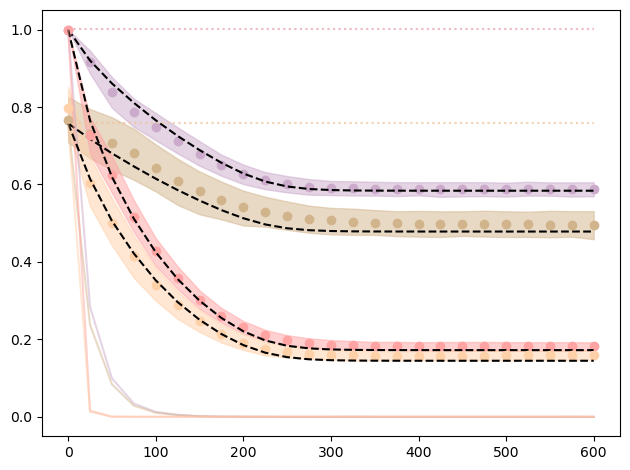

In [83]:
# Need to add the SI lines in post

eps_to_test = [0.01, 0.07]
dlt_to_test = [0, 0.07]

MIt_binsym = {}
for eps in eps_to_test:
    MIt_binsym[eps] = {}
    for dlt in dlt_to_test:
        MIt_binsym[eps][dlt] = run_MI(Q=single_flip_channel(1, eps), E=single_flip_channel(1, dlt), num_runs=1000, N=10e3, 
                                      resolution=25, n_bootstrap=1000,T=600)

with open('/data_users1/sagar/modeling-info-spread/pickles/MIt_binsym.pkl', 'wb') as fbs:
    pickle.dump(MIt_binsym, fbs)
    
plot_MIt_curves(MIt_binsym, eps_to_test, dlt_to_test)

In [84]:
eps_to_test = [0.01, 0.07]
dlt_to_test = [0, 0.07]

MIt_binasym = {}
for eps in eps_to_test:
    MIt_binasym[eps] = {}
    for dlt in dlt_to_test:
        MIt_binasym[eps][dlt] = run_MI(Q=bin_asym_channel(0.1, (0.1 - eps) % 1) , E=single_flip_channel(1, dlt), num_runs=1000, N=10e3, 
                                      resolution=25, n_bootstrap=1000,T=600)

with open('/data_users1/sagar/modeling-info-spread/pickles/MIt_binasym.pkl', 'wb') as fas:
    pickle.dump(MIt_binasym, fas)
    

Simulating: 100%|███████████████████████████| 1000/1000 [04:29<00:00,  3.70it/s]
Estimating CIs: 25it [00:17,  1.41it/s]
Simulating: 100%|███████████████████████████| 1000/1000 [04:29<00:00,  3.71it/s]
Estimating CIs: 25it [00:17,  1.39it/s]
Simulating:  94%|██████████████████████████▏ | 937/1000 [04:10<00:16,  3.71it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



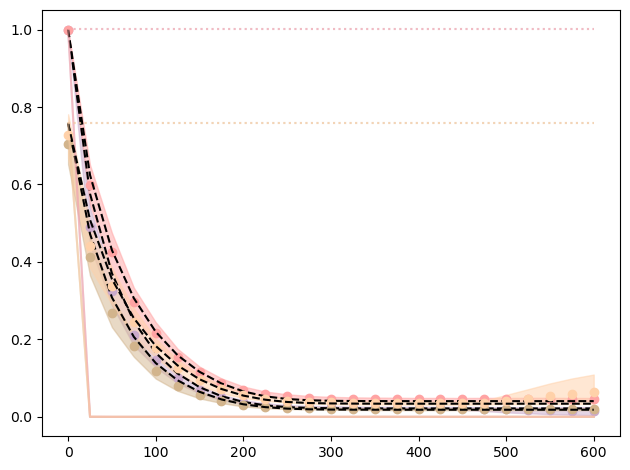

In [88]:
plot_MIt_curves(MIt_binasym, eps_to_test, dlt_to_test)

In [85]:
eps_to_test = [0.01, 0.04]
dlt_to_test = [0, 0.04]

MIt_triangle = {}
for eps in eps_to_test:
    MIt_triangle[eps] = {}
    for dlt in dlt_to_test:
        MIt_triangle[eps][dlt] = run_MI(Q=simplex_channel(3, eps), E=simplex_channel(3, dlt), num_runs=1000, N=10e3, 
                                      resolution=25, n_bootstrap=1000,T=600)

with open('/data_users1/sagar/modeling-info-spread/pickles/MIt_triangle.pkl', 'wb') as ft:
    pickle.dump(MIt_triangle, ft)
    

Simulating: 100%|███████████████████████████| 1000/1000 [04:27<00:00,  3.73it/s]
Estimating CIs: 25it [00:20,  1.25it/s]
Simulating: 100%|███████████████████████████| 1000/1000 [04:27<00:00,  3.74it/s]
Estimating CIs: 25it [00:19,  1.25it/s]
Simulating:  94%|██████████████████████████▏ | 937/1000 [04:09<00:16,  3.76it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



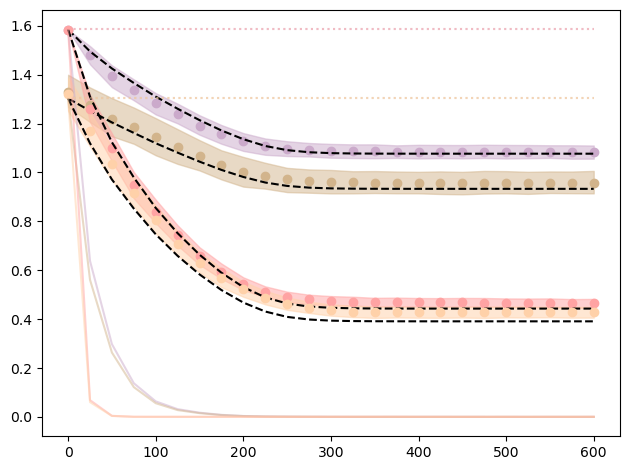

In [89]:
plot_MIt_curves(MIt_triangle, eps_to_test, dlt_to_test)

In [86]:
eps_to_test = [0.01, 0.11]
dlt_to_test = [0, 0.11]

MIt_cherry = {}
for eps in eps_to_test:
    MIt_cherry[eps] = {}
    for dlt in dlt_to_test:
        MIt_cherry[eps][dlt] = run_MI(Q=star_channel(3, eps), E=simplex_channel(3, dlt), num_runs=1000, N=10e3, 
                                      resolution=25, n_bootstrap=1000,T=600)

with open('/data_users1/sagar/modeling-info-spread/pickles/MIt_cherry.pkl', 'wb') as fc:
    pickle.dump(MIt_cherry, fc)
    


Simulating: 100%|███████████████████████████| 1000/1000 [04:30<00:00,  3.69it/s]
Estimating CIs: 25it [00:20,  1.21it/s]
Simulating: 100%|███████████████████████████| 1000/1000 [04:30<00:00,  3.69it/s]
Estimating CIs: 25it [00:20,  1.21it/s]
Simulating:  94%|██████████████████████████▏ | 937/1000 [04:14<00:17,  3.61it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



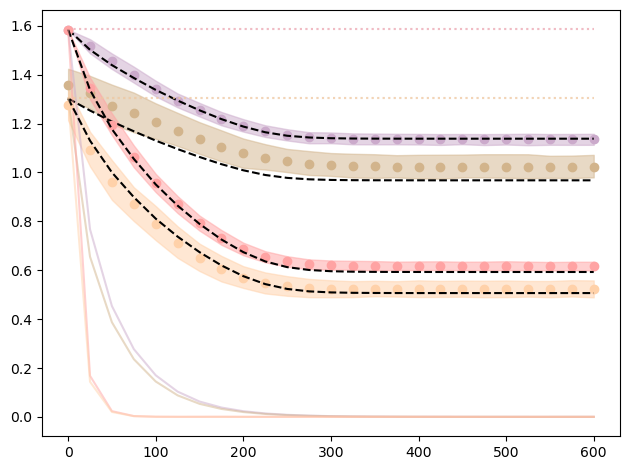

In [90]:
plot_MIt_curves(MIt_cherry, eps_to_test, dlt_to_test)

In [87]:
eps_to_test = [0.01, 0.04]
dlt_to_test = [0, 0.04]

MIt_paw = {}
for eps in eps_to_test:
    MIt_paw[eps] = {}
    for dlt in dlt_to_test:
        MIt_paw[eps][dlt] = run_MI(Q=paw_channel(eps), E=simplex_channel(4, dlt), num_runs=1000, N=10e3, 
                                      resolution=25, n_bootstrap=1000,T=600)

with open('/data_users1/sagar/modeling-info-spread/pickles/MIt_paw.pkl', 'wb') as fp:
    pickle.dump(MIt_paw, fp)
    


Simulating: 100%|███████████████████████████| 1000/1000 [04:32<00:00,  3.67it/s]
Estimating CIs: 25it [00:22,  1.10it/s]
Simulating: 100%|███████████████████████████| 1000/1000 [04:33<00:00,  3.66it/s]
Estimating CIs: 25it [00:22,  1.11it/s]
Simulating:  94%|██████████████████████████▏ | 937/1000 [04:15<00:17,  3.68it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



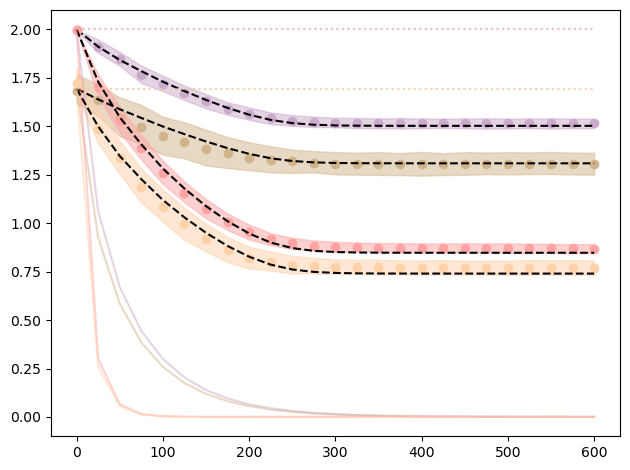

In [91]:
plot_MIt_curves(MIt_paw, eps_to_test, dlt_to_test)

In [2]:
test_ba = continuous_time_random_walk(Q=bin_asym_channel(0.1, (0.1-0.11) % 1), rate=1/0.04, initial_state=[1000,0], max_time=600)

UnboundLocalError: cannot access local variable 'a' where it is not associated with a value

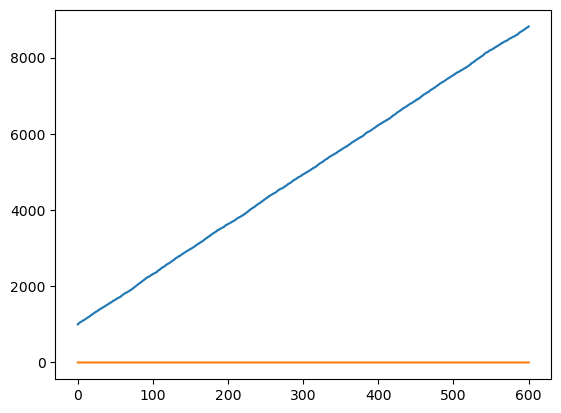

In [8]:
plt.plot(test_ba[0], test_ba[1])

In [28]:
test_bs = continuous_time_random_walk(Q=single_flip_channel(1,0.1), rate=0.04, initial_state=[1000,0], max_time=600)

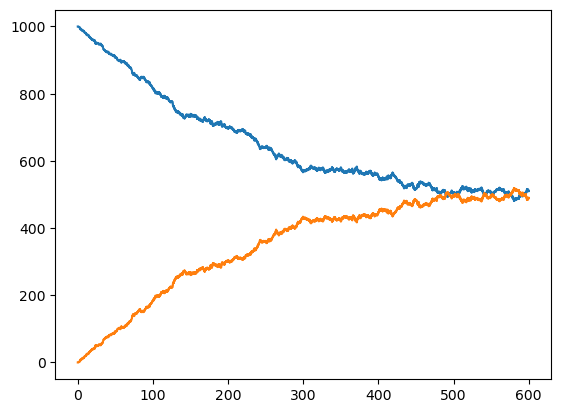

In [29]:
plt.plot(test_bs[0], test_bs[1])

In [12]:
a = single_flip_channel(1,0.5) @ np.array([1000,0])
a

array([500., 500.])

In [13]:
r = np.random.uniform(0, np.sum(a))
r

625.4992406286543

In [14]:
event = np.searchsorted(np.cumsum(a), r)
event

1

In [ ]:
for e in range(a.shape[0]):
    if event == e:
        state[e] += 1
        state[s] -= 1

In [8]:
test_bs[1]

array([[1.00000000e+00, 0.00000000e+00],
       [9.99324541e-01, 6.75459170e-04],
       [9.99151466e-01, 8.48533681e-04],
       ...,
       [5.00003046e-01, 4.99996954e-01],
       [5.00003043e-01, 4.99996957e-01],
       [5.00003041e-01, 4.99996959e-01]])

In [45]:
test_bs_2 = continuous_time_random_walk(Q=single_flip_channel(1,0.01), rate=1/250, initial_state=[0,1], max_time=600)

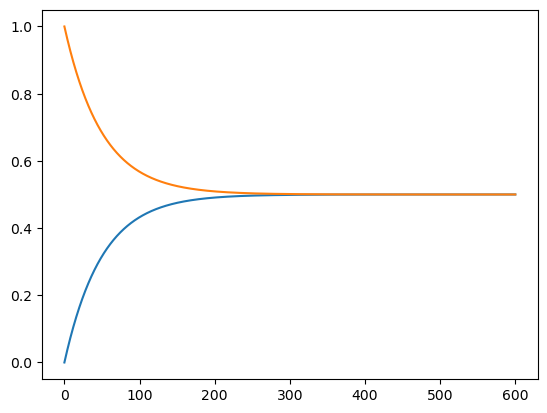

In [46]:
plt.plot(test_bs_2[0], test_bs_2[1])

In [13]:
test_bs_mi = simulate_mi(function='RW',
                Q = bin_asym_channel(0.1, 0),
                E = single_flip_channel(1,0.04),
                pW = [1/2,1/2],
                N= 1000,
                beta = 10,
                k = 4,
                num_runs = 100,
                T =  600,
                common_time = np.linspace(0,600, int(600/25 +1)),
                run_ci =True,
                n_bootstrap = 100
                )

Simulating RW: 100%|██████████████████████████| 100/100 [00:28<00:00,  3.54it/s]
Estimating CIs: 25it [00:00, 36.31it/s]


(0.0, 1.0)

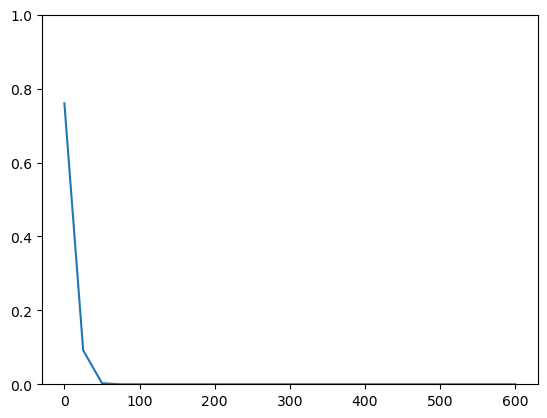

In [14]:
plt.plot(np.linspace(0,600, int(600/25 +1)), test_bs_mi[0])
plt.ylim(0,1)


In [9]:
def diffusion(t, phi):
    return 0.04 * (single_flip_channel(1, 0.04) - np.eye(single_flip_channel(1, 0.04).shape[0])) @ phi

In [30]:
test_oe = solve_ivp(fun=diffusion, t_span=[0,600], y0=np.array([0,1]), t_eval=np.linspace(0,600, int(600/25 + 1)))

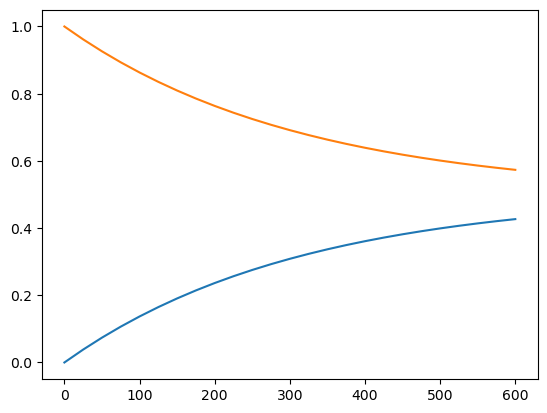

In [31]:
plt.plot(test_oe.t, test_oe.y.T)

In [49]:
np.random.choice(range(2))

0

# Long Simulations

In [128]:
num_runs = 1000

In [129]:
eps_to_test = [0.01, 0.07]
dlt_to_test = [0.01, 0.07]

In [ ]:
MIt_binsym = {}
for eps in eps_to_test:
    MIt_binsym[eps] = {}
    for dlt in dlt_to_test:
        MIt_binsym[eps][dlt] = run_MI(Q=single_flip_channel(1, eps), E=single_flip_channel(1, dlt), num_runs=num_runs, N=10e4, 
                                      resolution=25, n_bootstrap=1000,T=2500)

with open('/data_users1/sagar/modeling-info-spread/pickles/MIt_binsym_long.pkl', 'wb') as fbs:
    pickle.dump(MIt_binsym, fbs)
    
#plot_MIt_curves(MIt_binsym, eps_to_test, dlt_to_test)

Simulating NSI:   0%|                          | 4/1000 [00:10<43:27,  2.62s/it]

In [ ]:
MIt_binasym = {}
for eps in eps_to_test:
    MIt_binasym[eps] = {}
    for dlt in dlt_to_test:
        MIt_binasym[eps][dlt] = run_MI(Q=bin_asym_channel(0.1, (0.1 - eps) % 1) , E=single_flip_channel(1, dlt), 
                                       num_runs=num_runs, N=10e4, 
                                      resolution=25, n_bootstrap=1000,T=2500)

with open('/data_users1/sagar/modeling-info-spread/pickles/MIt_binasym_long.pkl', 'wb') as fas:
    pickle.dump(MIt_binasym, fas)

In [ ]:
MIt_triangle = {}
for eps in eps_to_test:
    MIt_triangle[eps] = {}
    for dlt in dlt_to_test:
        MIt_triangle[eps][dlt] = run_MI(Q=simplex_channel(3, eps), E=simplex_channel(3, dlt), 
                                        num_runs=num_runs, N=10e4, 
                                      resolution=25, n_bootstrap=1000,T=2500)

with open('/data_users1/sagar/modeling-info-spread/pickles/MIt_triangle_long.pkl', 'wb') as ft:
    pickle.dump(MIt_triangle, ft)

In [ ]:
MIt_cherry = {}
for eps in eps_to_test:
    MIt_cherry[eps] = {}
    for dlt in dlt_to_test:
        MIt_cherry[eps][dlt] = run_MI(Q=star_channel(3, eps), E=simplex_channel(3, dlt), num_runs=num_runs, N=10e4, 
                                      resolution=25, n_bootstrap=1000,T=2500)

with open('/data_users1/sagar/modeling-info-spread/pickles/MIt_cherry_long.pkl', 'wb') as fc:
    pickle.dump(MIt_cherry, fc)

In [ ]:
MIt_paw = {}
for eps in eps_to_test:
    MIt_paw[eps] = {}
    for dlt in dlt_to_test:
        MIt_paw[eps][dlt] = run_MI(Q=paw_channel(eps), E=simplex_channel(4, dlt), num_runs=num_runs, N=10e4, 
                                      resolution=25, n_bootstrap=1000,T=2500)

with open('/data_users1/sagar/modeling-info-spread/pickles/MIt_paw_long.pkl', 'wb') as fp:
    pickle.dump(MIt_paw, fp)

In [20]:
colors = ["#FFA3A3", "#CBAACB", "#D2B48C", "#FFD1A9"]
magenta = "#8E24AA"
beige = "#D19B85"

In [97]:
MI_dicts = [(MIt_binsym, 2), (MIt_binasym, 2), (MIt_triangle, 3), (MIt_cherry, 3), (MIt_paw, 4)]

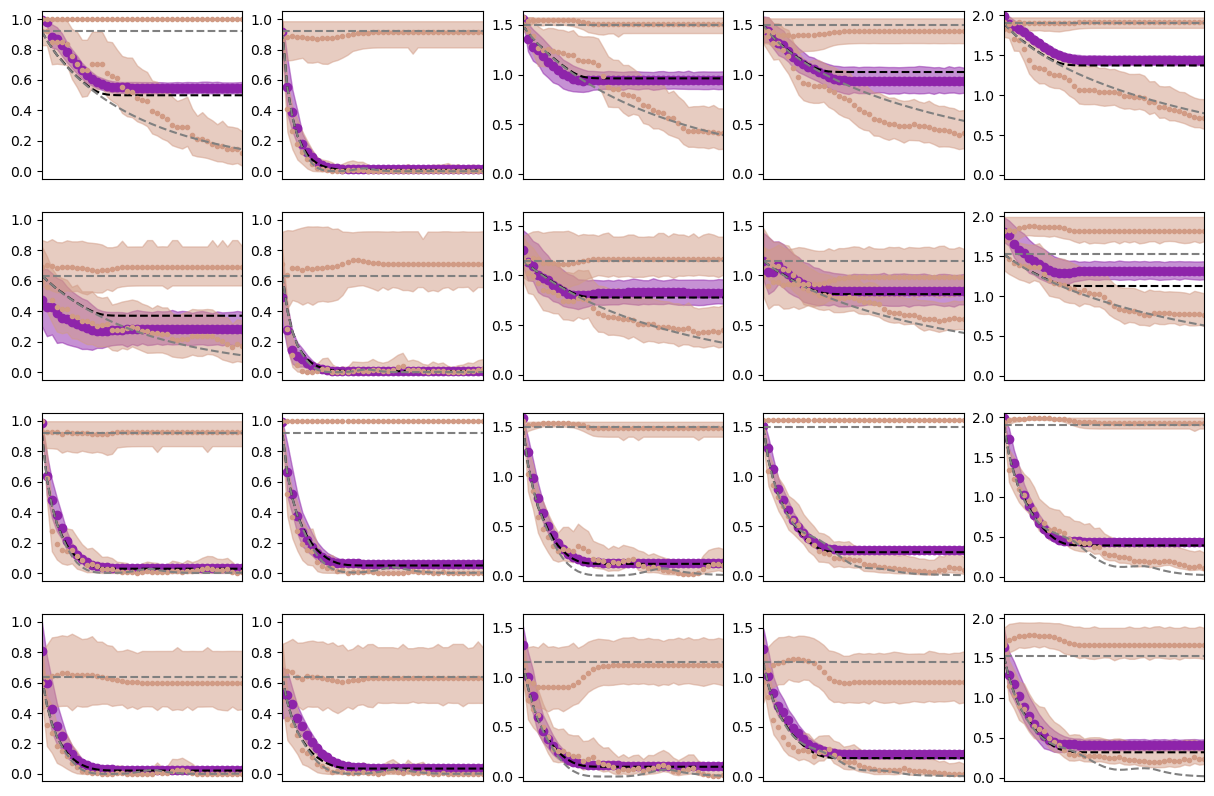

In [31]:


fig, axs = plt.subplots(4, 5, figsize=(15, 10))
                        
for n, err_pair in enumerate(product(dlt_to_test, eps_to_test)):
    for m, channel_pair in enumerate(MI_dicts):
                              
        eps, dlt = err_pair
        channel_dict, channel_size = channel_pair
                              
        run = channel_dict[eps][dlt]
        
        axs[n][m].plot(run['time'], run['mc_means'], 'o',color=magenta)
        axs[n][m].fill_between(run['time'], run['mc_lower'], run['mc_upper'], alpha=0.5, color=magenta)
        axs[n][m].plot(run['time'], run['mean_field'],linestyle='dashed', color='k')

        axs[n][m].plot(run['time'], run['rw_means'], '.', color=beige)
        axs[n][m].fill_between(run['time'], run['rw_lower'], run['rw_upper'], alpha=0.5, color=beige)
        axs[n][m].plot(run['time'], run['markov_chain'],linestyle='dashed', color='gray')

        axs[n][m].plot(run['time'], run['si_means'], '.',color=beige)
        axs[n][m].fill_between(run['time'], run['si_lower'], run['si_upper'], alpha=0.5, color=beige)
        axs[n][m].plot(run['time'], run['SI'],linestyle='dashed', color='gray')
        
        axs[n][m].set_ylim(-0.05, np.log2(channel_size)+0.05)
        axs[n][m].set_xlim(0, 1000)
        axs[n][m].set_xticks([])
        
#fig.savefig('/home/sagar/modeling-info-spread/reports/figures/draft_figure_info.pdf')

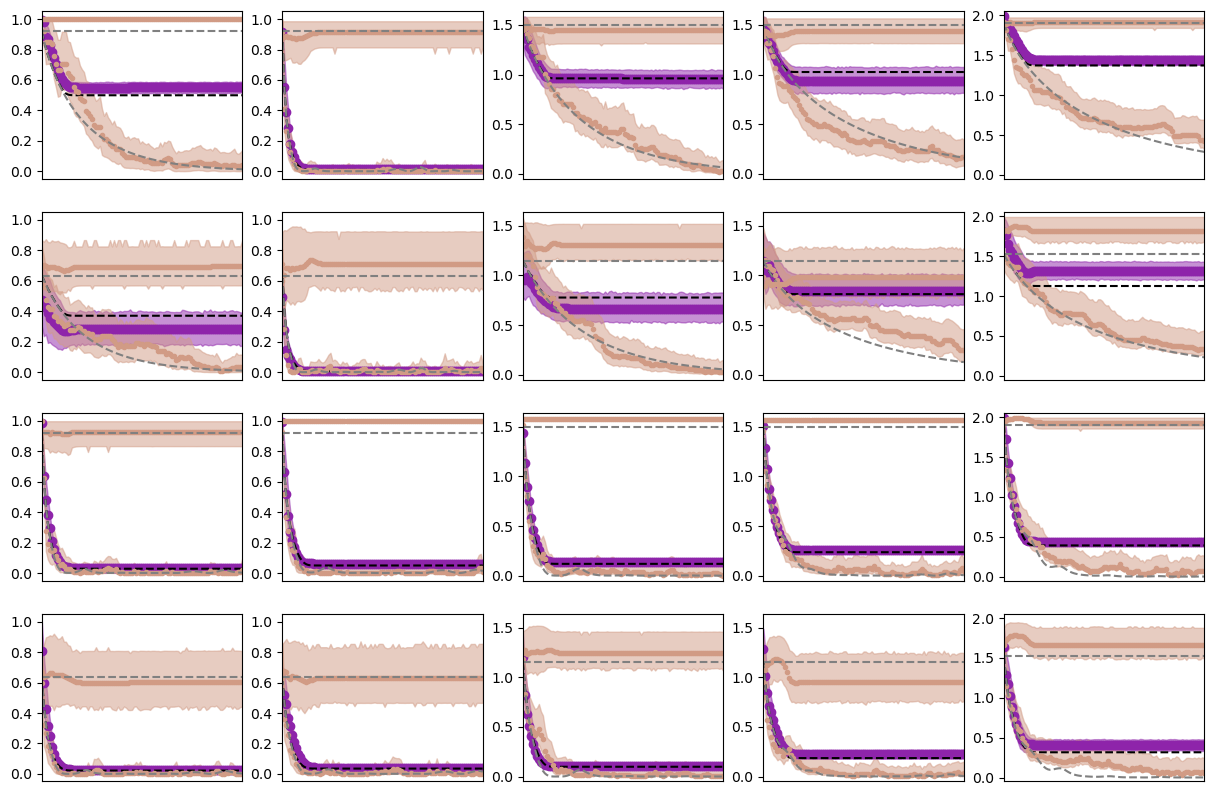

In [98]:
fig, axs = plt.subplots(4, 5, figsize=(15, 10))

for n, err_pair in enumerate(product(dlt_to_test, eps_to_test)):
    for m, channel_pair in enumerate(MI_dicts):
                              
        eps, dlt = err_pair
        channel_dict, channel_size = channel_pair
                              
        run = channel_dict[eps][dlt]
        
        axs[n][m].plot(run['time'], run['mc_means'], 'o',color=magenta)
        axs[n][m].fill_between(run['time'], run['mc_lower'], run['mc_upper'], alpha=0.5, color=magenta)
        axs[n][m].plot(run['time'], run['mean_field'],linestyle='dashed', color='k')

        axs[n][m].plot(run['time'], run['rw_means'], '.', color=beige)
        axs[n][m].fill_between(run['time'], run['rw_lower'], run['rw_upper'], alpha=0.5, color=beige)
        axs[n][m].plot(run['time'], run['markov_chain'],linestyle='dashed', color='gray')

        axs[n][m].plot(run['time'], run['si_means'], '.',color=beige)
        axs[n][m].fill_between(run['time'], run['si_lower'], run['si_upper'], alpha=0.5, color=beige)
        axs[n][m].plot(run['time'], run['SI'],linestyle='dashed', color='gray')
        
        axs[n][m].set_ylim(-0.05, np.log2(channel_size)+0.05)
        axs[n][m].set_xlim(0, 2500)
        axs[n][m].set_xticks([])
        
fig.savefig('/home/sagar/modeling-info-spread/reports/figures/draft_figure_info_longer.pdf')

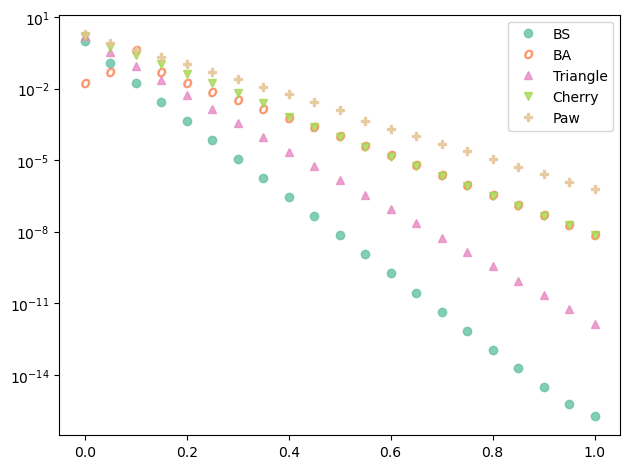

In [90]:
cap_cmap = plt.cm.Set2
markers = ['o', '$O$', '^', 'v', 'P']

color_acc = 0
plt.plot(np.linspace(0,1,21), 
         [estimate_spreading_capacity(Q=single_flip_channel(1,err), 
                                      E=single_flip_channel(1,0.001))[0] for err in np.linspace(0,1,21)], 
         marker=markers[color_acc], color=cap_cmap(color_acc/5), alpha=0.8, label='BS', linestyle='None')

color_acc += 1

plt.plot(np.linspace(0,1,21), # This should be 0.1
         [estimate_spreading_capacity(Q=bin_asym_channel(0.1,np.abs(0.1 - err)), 
                                      E=single_flip_channel(1,0.001))[0] for err in np.linspace(0,1,21)], 
         marker=markers[color_acc], color=cap_cmap(color_acc/5), alpha=0.8, label='BA', linestyle='None')

color_acc += 1

plt.plot(np.linspace(0,1,21), 
         [estimate_spreading_capacity(Q=simplex_channel(3,err), 
                                      E=simplex_channel(3,0.001))[0] for err in np.linspace(0,1,21)], 
         marker=markers[color_acc], color=cap_cmap(color_acc/5), alpha=0.8, label='Triangle', linestyle='None')

color_acc += 1

plt.plot(np.linspace(0,1,21), 
         [estimate_spreading_capacity(Q=star_channel(3,err), 
                                      E=simplex_channel(3,0.001))[0] for err in np.linspace(0,1,21)], 
         marker=markers[color_acc], color=cap_cmap(color_acc/5), alpha=0.8, label='Cherry', linestyle='None')

color_acc += 1

plt.plot(np.linspace(0,1,21), 
         [estimate_spreading_capacity(Q=paw_channel(err), 
                                      E=simplex_channel(4,0.001))[0] for err in np.linspace(0,1,21)], 
         marker=markers[color_acc], color=cap_cmap(color_acc/5), alpha=0.8, label='Paw', linestyle='None')

color_acc += 1

plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.savefig('/home/sagar/modeling-info-spread/reports/figures/draft_capacity_curves.pdf')

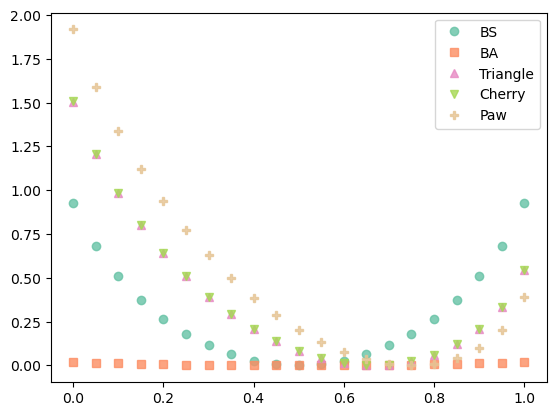

In [76]:
#cap_cmap = plt.cm.Set2
#markers = ['o', 's', '^', 'v', '1']

color_acc = 0
plt.plot(np.linspace(0,1,21), 
         [estimate_spreading_capacity(Q=single_flip_channel(1,0.001), 
                                      E=single_flip_channel(1,err))[0] for err in np.linspace(0,1,21)], 
         linestyle='None', marker=markers[color_acc], color=cap_cmap(color_acc/5), alpha=0.8, label='BS')

color_acc += 1

plt.plot(np.linspace(0,1,21), # This should be 0.1
         [estimate_spreading_capacity(Q=bin_asym_channel(0.1,np.abs(0.1 - 0.001)), 
                                      E=single_flip_channel(1,err))[0] for err in np.linspace(0,1,21)], 
         linestyle='None', marker=markers[color_acc], color=cap_cmap(color_acc/5), alpha=0.8, label='BA')

color_acc += 1

plt.plot(np.linspace(0,1,21), 
         [estimate_spreading_capacity(Q=simplex_channel(3,0.001), 
                                      E=simplex_channel(3,err))[0] for err in np.linspace(0,1,21)], 
         linestyle='None', marker=markers[color_acc], color=cap_cmap(color_acc/5), alpha=0.8, label='Triangle')

color_acc += 1

plt.plot(np.linspace(0,1,21), 
         [estimate_spreading_capacity(Q=star_channel(3,0.001), 
                                      E=simplex_channel(3,err))[0] for err in np.linspace(0,1,21)], 
         linestyle='None', marker=markers[color_acc], color=cap_cmap(color_acc/5), alpha=0.8, label='Cherry')

color_acc += 1

plt.plot(np.linspace(0,1,21), 
         [estimate_spreading_capacity(Q=paw_channel(0.001), 
                                      E=simplex_channel(4,err))[0] for err in np.linspace(0,1,21)], 
         linestyle='None', marker=markers[color_acc], color=cap_cmap(color_acc/5), alpha=0.8, label='Paw')

color_acc += 1

#plt.yscale('log')
plt.legend()
#plt.savefig('/home/sagar/modeling-info-spread/reports/figures/draft_capacity_curves.pdf')

In [87]:
fig, axs = plt.subplots(5, 1, figsize=(2, 8))

trial_eps = [0.01, 0.05, 0.1, 0.5]

dlt_cmap = plt.cm.YlOrRd

dlt_colors = ["#FFD700", "#FFA500", "#FF4500", "#FF0000"]

for n, channel_pair in enumerate(MI_dicts):
    
    channel_dict, channel_size = channel_pair
    
    for m, eps in enumerate(trial_eps):
        axs[n].plot(np.linspace(0,1,21), [estimate_spreading_capacity(Q=channel_dict[eps][, 
                                                                   E=single_flip_channel(1,err))[0] 
                                       for err in np.linspace(0,1,21)],
                markers[n], color=dlt_colors[m], markersize=2)
        

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' on line 14 (3181398389.py, line 15)

In [63]:
np.linspace(0,np.log2(2),3)

array([0. , 0.5, 1. ])

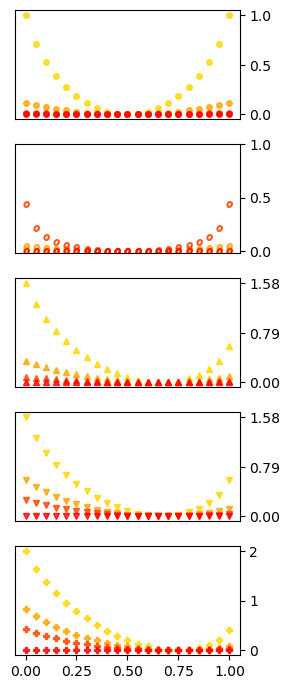

In [94]:
fig, axs = plt.subplots(5, 1, figsize=(3, 7))

trial_eps = [0, 0.05, 0.1, 0.5]

dlt_cmap = plt.cm.YlOrRd

dlt_colors = ["#FFD700", "#FFA500", "#FF4500", "#FF0000"]

color_acc = 0
for n, eps in enumerate(trial_eps):
    axs[0].plot(np.linspace(0,1,21), 
             [estimate_spreading_capacity(Q=single_flip_channel(1,eps), 
                                          E=single_flip_channel(1,err))[0] for err in np.linspace(0,1,21)], 
             linestyle='None', marker=markers[color_acc], color=dlt_colors[n], alpha=0.8, label='BS', markersize=4)
    axs[0].set_xticks([])
    axs[0].set_yticks(np.linspace(0,np.log2(2),3))
    axs[0].yaxis.tick_right()

color_acc += 1
for n, eps in enumerate(trial_eps):
    axs[1].plot(np.linspace(0,1,21), # This should be 0.1
             [estimate_spreading_capacity(Q=bin_asym_channel(0.1,np.abs(0.1 - eps)), 
                                          E=single_flip_channel(1,err))[0] for err in np.linspace(0,1,21)], 
                 linestyle='None', marker=markers[color_acc], color=dlt_colors[n], alpha=0.8, label='BA', markersize=4)
    axs[1].set_xticks([])
    axs[1].set_yticks(np.linspace(0,np.log2(2),3))
    axs[1].yaxis.tick_right()
    
color_acc += 1
for n, eps in enumerate(trial_eps):
    axs[2].plot(np.linspace(0,1,21), 
             [estimate_spreading_capacity(Q=simplex_channel(3,eps), 
                                          E=simplex_channel(3,err))[0] for err in np.linspace(0,1,21)], 
             linestyle='None', marker=markers[color_acc], color=dlt_colors[n], alpha=0.8, label='Triangle', markersize=4)
    axs[2].set_xticks([])
    axs[2].set_yticks([np.round(i,2) for i in np.linspace(0,np.log2(3),3)])
    axs[2].yaxis.tick_right()

color_acc += 1
for n, eps in enumerate(trial_eps):
    axs[3].plot(np.linspace(0,1,21), 
             [estimate_spreading_capacity(Q=star_channel(3,eps), 
                                          E=simplex_channel(3,err))[0] for err in np.linspace(0,1,21)], 
             linestyle='None', marker=markers[color_acc], color=dlt_colors[n], alpha=0.8, label='Cherry', markersize=4)
    axs[3].set_xticks([])
    axs[3].set_yticks([np.round(i,2) for i in np.linspace(0,np.log2(3),3)])
    axs[3].yaxis.tick_right()

color_acc += 1
for n, eps in enumerate(trial_eps):
    axs[4].plot(np.linspace(0,1,21), 
             [estimate_spreading_capacity(Q=paw_channel(eps), 
                                          E=simplex_channel(4,err))[0] for err in np.linspace(0,1,21)], 
             linestyle='None', marker=markers[color_acc], color=dlt_colors[n], alpha=0.8, label='Paw', markersize=4)
    axs[4].set_yticks(np.linspace(0,np.log2(4),3))
    axs[4].yaxis.tick_right()

color_acc += 1

plt.tight_layout()

#plt.yscale('log')
#fig.legend()
plt.savefig('/home/sagar/modeling-info-spread/reports/figures/draft_dlt_capacity_curves.pdf')

# Channel Capacities

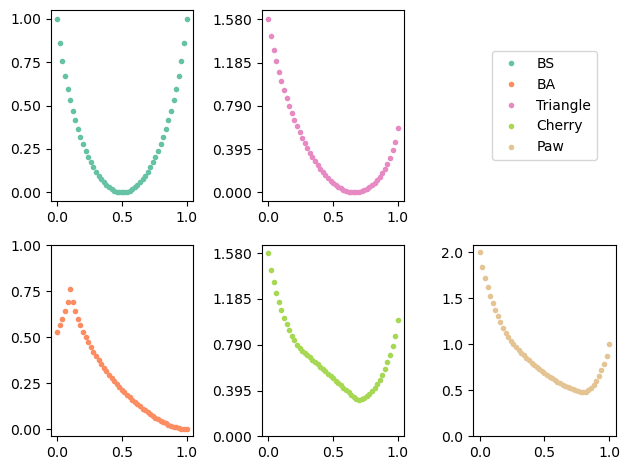

In [127]:
fig, axs = plt.subplots(2,3)

err_range = np.linspace(0,1,51)

bs_ax, = axs[0,0].plot(err_range, [estimate_capacity(single_flip_channel(1,e))[0] for e in err_range], 
              linestyle='none', marker='.', color=cap_cmap(0/5))

axs[0,0].set_yticks(np.linspace(0, np.round(np.log2(2), 2), 5))

ba_ax, = axs[1,0].plot(err_range, [estimate_capacity(bin_asym_channel(0.1, np.abs(0.1-e)))[0] for e in err_range], 
             linestyle='none', marker='.', color=cap_cmap(1/5))
axs[1,0].set_yticks(np.linspace(0, np.round(np.log2(2), 2), 5))

tri_ax, = axs[0,1].plot(err_range, [estimate_capacity(simplex_channel(3, e))[0] for e in err_range], 
             linestyle='none', marker='.', color=cap_cmap(2/5))
axs[0,1].set_yticks(np.linspace(0, np.round(np.log2(3), 2), 5))

ch_ax, = axs[1,1].plot(err_range, [estimate_capacity(star_channel(3, e))[0] for e in err_range], 
             linestyle='none', marker='.', color=cap_cmap(3/5))
axs[1,1].set_yticks(np.linspace(0, np.round(np.log2(3), 2), 5))


axs[0,2].axis('off')

paw_ax, = axs[1,2].plot(err_range, [estimate_capacity(paw_channel(e))[0] for e in err_range], 
             linestyle='none', marker='.', color=cap_cmap(4/5))
axs[1,2].set_yticks(np.linspace(0, np.round(np.log2(4), 2), 5))


axs[0,2].legend([bs_ax, ba_ax, tri_ax, ch_ax, paw_ax],["BS", "BA", "Triangle", "Cherry", "Paw"],
               loc='center')

plt.tight_layout()
plt.savefig('/home/sagar/modeling-info-spread/reports/figures/capacity_supplement.pdf')